In [246]:
# import libraries
import numpy as np

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


import matplotlib.pyplot as plt
from scipy.integrate import quad


#define function for local emmisivity and opacity
def η(x):
    return 0.0

def χ(x):
    return 1.0

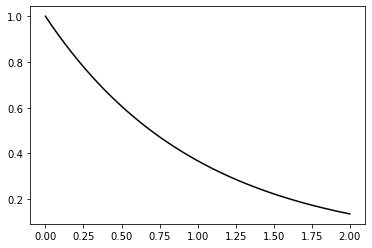

In [247]:
x = np.linspace(0,2,1000)

I_init = 1

chi = np.vectorize(χ)
eta = np.vectorize(η)

χ_x = chi(x)
I = I_init*np.exp(-χ_x*x)

plt.plot(x,I,'k')

In [248]:
#Now process for GP
x = np.linspace(0,2,1000)

#First some function values at some point 
y_p  = np.array([0.0 ,  2])
fy_p = (I_init*np.exp(-chi(y_p)*y_p))

#Second some values for the L operator at some points
y_d  = np.array([0.0 , 1 ,  2])
fy_d = eta(y_d)


print(fy_p)


[1.         0.13533528]


In [249]:
alpha = 1.0
h = 0.5

def kernel(x, y, h):
    return alpha**2 * np.exp(-0.5 * (x-y)**2 / h**2)

def Lx_kernel(x, y, h):
    return (chi(x)*h**2 - (x-y)) / h**2 * kernel(x, y, h)

def Ly_kernel(x, y, h):
    return (chi(y)*h**2 + (x-y)) / h**2 * kernel(x, y, h)

def L2_kernel(x, y, h):
    return (h**4 - (chi(x)-chi(y))*(x-y)*h**2 + h**2 - (x-y)**2) / h**4 * kernel(x, y, h)


def corr(x, y, h):
    x, y = np.meshgrid(x, y)
    return kernel(x, y, h).T

def Lx_corr(x, y, h):
    x, y = np.meshgrid(x, y)
    return Lx_kernel(x, y, h).T

def Ly_corr(x, y, h):
    x, y = np.meshgrid(x, y)
    return Ly_kernel(x, y, h).T

def L2_corr(x, y, h):
    x, y = np.meshgrid(x, y)
    return L2_kernel(x, y, h).T

In [251]:
def GP_fit(h):
    sigma_00 = corr(x, x, h)

    sigma_10 = np.block([   corr(x, y_p, h),
                         Ly_corr(x, y_d, h) ])

    sigma_01 = np.block([   corr(y_p, x, h).T,
                         Lx_corr(y_d, x, h).T ]).T

    sigma_11 = np.block([[   corr(y_p, y_p, h), Lx_corr(y_d, y_p, h).T],
                             [Ly_corr(y_p, y_d, h).T, L2_corr(y_d, y_d, h)  ] ])


    fy = np.block([fy_p, fy_d])

    mean =            np.matmul(np.matmul(sigma_10, np.linalg.inv(sigma_11)), fy)
    cov  = sigma_00 - np.matmul(np.matmul(sigma_10, np.linalg.inv(sigma_11)), sigma_01)
    
    fs = np.random.multivariate_normal(mean, cov, 25).T
    
    plt.figure(1,dpi = 100)
    plt.plot(x, mean, linewidth=0.90)
    plt.plot(x, I, 'k',linewidth=0.45)
    plt.plot(x, mean+2.0*np.diagonal(cov), linestyle='--', c='red', linewidth=0.6)
    plt.plot(x, mean-2.0*np.diagonal(cov), linestyle='--', c='red', linewidth=0.6)
    plt.plot(x, fs, c='gray', linewidth=0.15)
    plt.show()
    
    plt.imshow(cov)
    plt.show()
    
    plt.scatter(x, np.abs(I-mean) )
    plt.show()
    

interact(GP_fit,h=(0.1,3,0.001))

interactive(children=(FloatSlider(value=1.55, description='h', max=3.0, min=0.1, step=0.001), Output()), _dom_…

<function __main__.GP_fit(h)>

Radiative Transfer Equation with a Constant Source function

$I(t) = I(0)e^{-t} + S(1 - e^{-t})$

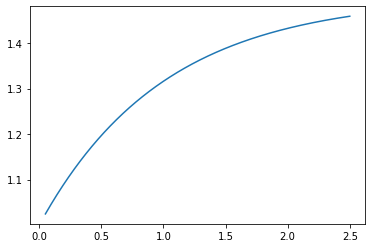

In [252]:
x = np.linspace(0.1,5,1000)
Io = 1 ; S = 1.5
t_x = 0.5*x

I = Io*(np.exp(-t_x)) + S*(1 - np.exp(-t_x) )
plt.plot(t_x  , I)




In [253]:
#Now process for GP
x = np.linspace(0.1,5,1000)
#optical depth define in terms of x
x = 0.5*x

#First some function values at some point 
y_p  = np.array([x[2] ,x[999]])
fy_p = (Io*(np.exp(-y_p)) + S*(1 - np.exp(-y_p) ))

#Second some values for the L operator at some points
y_d  = np.array([x[20] , x[400]  ,x[900]])
fy_d = np.array([S,S,S])


print(fy_p)

[1.02671242 1.4589575 ]


In [254]:
alpha = 1.0
h = 0.5

def kernel(x, y, h):
    return alpha**2 * np.exp(-0.5 * (x-y)**2 / h**2)

def Lx_kernel(x, y, h):
    return (h**2 - (x-y)) / h**2 * kernel(x, y, h)

def Ly_kernel(x, y, h):
    return (h**2 + (x-y)) / h**2 * kernel(x, y, h)

def L2_kernel(x, y, h):
    return (h**4 - (1-1)*(x-y)*h**2 + h**2 - (x-y)**2) / h**4 * kernel(x, y, h)


def corr(x, y, h):
    x, y = np.meshgrid(x, y)
    return kernel(x, y, h).T

def Lx_corr(x, y, h):
    x, y = np.meshgrid(x, y)
    return Lx_kernel(x, y, h).T

def Ly_corr(x, y, h):
    x, y = np.meshgrid(x, y)
    return Ly_kernel(x, y, h).T

def L2_corr(x, y, h):
    x, y = np.meshgrid(x, y)
    return L2_kernel(x, y, h).T


In [255]:
def GP_fit(h):
    sigma_00 = corr(x, x, h)

    sigma_10 = np.block([   corr(x, y_p, h),
                         Ly_corr(x, y_d, h) ])

    sigma_01 = np.block([   corr(y_p, x, h).T,
                         Lx_corr(y_d, x, h).T ]).T

    sigma_11 = np.block([[   corr(y_p, y_p, h), Lx_corr(y_d, y_p, h).T],
                             [Ly_corr(y_p, y_d, h).T, L2_corr(y_d, y_d, h)  ] ])


    fy = np.block([fy_p, fy_d])

    mean =            np.matmul(np.matmul(sigma_10, np.linalg.inv(sigma_11)), fy)
    cov  = sigma_00 - np.matmul(np.matmul(sigma_10, np.linalg.inv(sigma_11)), sigma_01)
    
    fs = np.random.multivariate_normal(mean, cov, 25).T
    
    plt.figure(1,dpi = 100)
    plt.plot(x, mean, linewidth=0.90)
    plt.plot(x, I, 'k')
    plt.plot(x, mean+2.0*np.diagonal(cov), linestyle='--', c='red', linewidth=0.5)
    plt.plot(x, mean-2.0*np.diagonal(cov), linestyle='--', c='red', linewidth=0.5)
    plt.plot(x, fs, c='gray', linewidth=0.2)
    plt.show()
    
    plt.imshow(cov)
    plt.show()
    
    plt.scatter(x, np.abs(I-mean) )
    plt.show()
    

interact(GP_fit,h=(0.1,2,0.001))

interactive(children=(FloatSlider(value=1.05, description='h', max=2.0, min=0.1, step=0.001), Output()), _dom_…

<function __main__.GP_fit(h)>

1D example with source function now having a form 


$S = a + b \cdot t$

$I(\tau_{1},\mu) =  I(\tau_{2},\mu) \exp(\frac{-(\tau_{2} - \tau_{1})}{\mu}) + \int_{\tau_{1}}^{\tau_{2}} S(t) \exp(\frac{-(t - \tau_{1})}{\mu}) \frac{dt}{\mu}$

$\tau_2$ $\rightarrow$ high optical depth(center of $\star$), So that means z = 0 at this point

$\tau_1$ $\rightarrow$ low optical depth, So that mean z = let's say 5 at the surface

$d \tau$ = $-\alpha$ dz

let's take,

$\alpha (z)=a z$ where let's say a = .5

$\tau (z) = \frac{a}{2} (z^2_{max} - z^2)$

# $(\frac{\partial}{\partial \tau} + 1 )I = S $

# First check for a constant source function

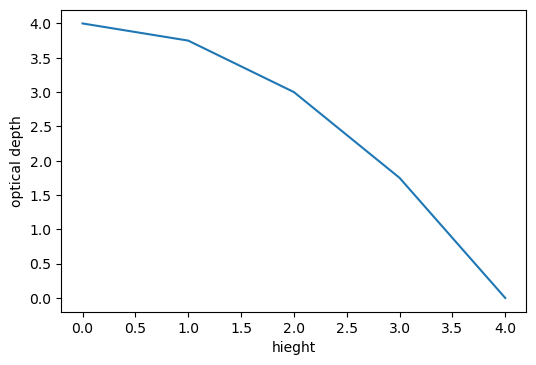

[4.   3.75 3.   1.75 0.  ]


In [227]:
z_max = 4 ; a = 0.5
x = np.linspace(0,z_max,5)
z = x
#optical depth
x = a/2*(z_max**2 - (x**2))
plt.figure(1,dpi=100)
plt.xlabel("hieght") ; plt.ylabel("optical depth") 
plt.plot(z,x)
plt.show()

#print("Optical_Depth",x)

a = 0.5
b = 0.5

I_final = []
print(x)

# Source Function
# $S = a + b$

In [228]:
def integrand(x, a, b,t):
    return (a+b)*np.exp(-(x - t))

for i in range(0,len(x)):
    t = x[i]
    temp = quad(integrand, x[i] , np.amax(x), args=(a,b,t))
    I_final.append(temp[0]) 

  

In [229]:
print(I_final)

[0.0, 0.22119921692859515, 0.6321205588285578, 0.8946007754381355, 0.9816843611112659]


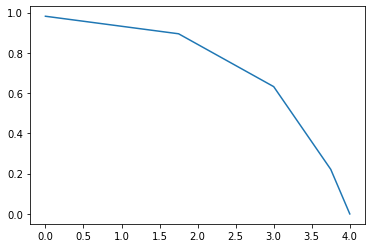

In [230]:
plt.plot(x,I_final)